## 2022, Jan 18
# CAR PRICE PREDICTION

This is a medium-sized project of ***Machine Learning***. In this project we will have the opportunity to apply many algorithms commonly used for regression problems.

Also, we will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, we will take a look at the determines.



## Determines

We will use **Auto Scout** data, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. We have already make EDA for that data. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

After EDA process we have sufficient domain knowledge.

Therefore, we will not need any EDA process as we will be working on the edited data.

---

In this case, we will estimate the prices of cars using regression algorithms.

While starting we should import the necessary modules and load the data given as pkl file. Also we'll need to do a few pre-processing before moving to modelling. After that we will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. We can measure the success of our models with regression evaluation metrics as well as with cross validation method.

For the better results, we should try to increase the success of our models by performing hyperparameter tuning. Determine feature importances for the model. We can set our model with the most important features for resource saving. We should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, we will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally we can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#import_modules_load_data_and_data_review">Import Modules, Load Data, Data Review</a></li>
        <li><a href="#data_preprocessing">Data Pre-Processing</a></li>
        <li><a href="#implementing_Linear_Regression">Implementing Linear Regression</a></li>
        <li><a href="#implementing_ridge_Regression">Implementing Ridge Regression</a></li>
        <li><a href="#implementing_lasso_Regression">Implementing Lasso Regression</a></li>
        <li><a href="#implementing_lasso_Regression">Implementing Elastic Net</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="import_modules_load_data_and_data_review">1. Import Modules, Load Data, Data Review</h2>

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("final_scout_dummy.csv")

In [4]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
0,15770,56013.0,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8,...,0,0,1,0,1,0,0,0,1,0
1,14500,80000.0,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6,...,0,0,1,0,1,0,0,0,1,0
2,14640,83450.0,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8,...,0,0,1,0,1,0,0,0,1,0
3,14500,73000.0,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8,...,0,0,1,0,1,0,0,0,1,0
4,16790,16200.0,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1,...,0,0,1,0,1,0,0,0,1,0


In [5]:
df.shape

(15915, 143)

In [6]:
df.corr()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,...,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
price,1.000000,-0.399291,0.530291,-0.473478,-0.144628,0.696411,0.008180,0.281824,0.468433,0.272261,...,-0.049888,-0.035390,-0.386556,0.386556,0.391283,-0.431675,0.123043,0.158032,-0.155718,-0.005782
km,-0.399291,1.000000,-0.033171,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198,...,0.010414,-0.029852,-0.034449,0.034449,-0.108580,0.095489,0.037676,-0.010118,0.009749,0.001953
Gears,0.530291,-0.033171,1.000000,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733,...,-0.049749,-0.029608,-0.226584,0.226584,0.577080,-0.617596,0.125146,0.101277,-0.099723,-0.004215
age,-0.473478,0.758306,-0.064524,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303,...,0.048200,-0.046952,-0.012297,0.012297,-0.094875,0.066074,0.084242,-0.059031,0.057757,0.005095
Previous_Owners,-0.144628,0.157041,-0.036612,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172,...,0.097720,-0.025799,-0.008901,0.008901,0.031344,-0.027503,-0.011062,-0.068745,0.068369,-0.002003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gearing_Type_Manual,-0.431675,0.095489,-0.617596,0.066074,-0.027503,-0.395527,-0.037980,-0.230192,-0.206747,-0.233030,...,0.038206,0.040295,0.262878,-0.262878,-0.942589,1.000000,-0.178497,-0.060852,0.059218,0.007548
Gearing_Type_Semi-automatic,0.123043,0.037676,0.125146,0.084242,-0.011062,0.089618,-0.080865,0.096286,0.013266,-0.061445,...,0.000473,-0.035581,-0.071834,0.071834,-0.160342,-0.178497,1.000000,0.013173,-0.012662,-0.002763
Drive_chain_4WD,0.158032,-0.010118,0.101277,-0.059031,-0.068745,0.192034,-0.009585,0.168260,0.093409,0.134088,...,-0.005115,0.085018,-0.120306,0.120306,0.056574,-0.060852,0.013173,1.000000,-0.990212,-0.001807
Drive_chain_front,-0.155718,0.009749,-0.099723,0.057757,0.068369,-0.191261,0.009478,-0.168458,-0.094112,-0.133620,...,0.005165,-0.083755,0.119257,-0.119257,-0.055108,0.059218,-0.012662,-0.990212,1.000000,-0.137783


In [7]:
df.price.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

<AxesSubplot:>

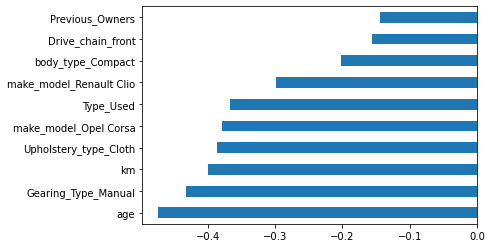

In [8]:
df.corr()["price"].sort_values().head(10).plot.barh()

<AxesSubplot:>

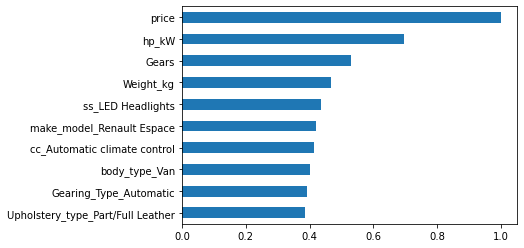

In [9]:
df.corr()["price"].sort_values().tail(10).plot.barh()

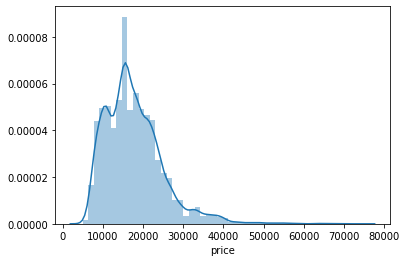

In [32]:
sns.distplot(df.price)

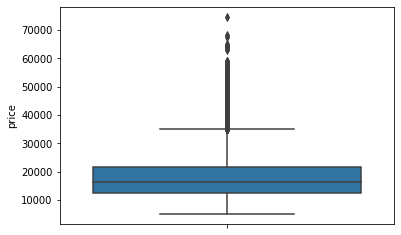

In [33]:
sns.boxplot(df.price, orient="v")

<h2 id="data_preprocessing">2. Data Pre-Processing</h2>

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

We must also drop your target variable, the column you are trying to predict.

We can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model we train. We can define a function to view different metric results together.

We can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from our test set and calculates the accuracy score for each data sample. We can calculate the final performance of our estimator by averaging these scores.

### Train Test Split

In [10]:
X=df.drop(["price"], axis=1)

In [11]:
y=df["price"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11140, 142), (4775, 142), (11140,), (4775,))

### Defining a Function for Evaluation Metrics

In [16]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

<h2 id="implementing_Linear_Regression">3. Implementing Linear Regression</h2>

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: We can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

### Import Modul and Fit the Model

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Predict the Test Set

In [18]:
y_pred=lm.predict(X_test)

### Determine feature coefficiant

In [19]:
lm.coef_

array([-3.57799899e-02,  6.28960841e+02, -1.62648163e+03,  8.99108472e+01,
        9.34669011e+01, -2.52268830e+02, -6.97421199e-01, -1.41670577e+00,
        1.30185942e+02,  2.47630935e+02, -6.31217320e+02,  3.07349586e+01,
        2.27980871e+02, -2.54797237e+02,  2.40390227e+02, -1.22602516e+03,
       -4.16499077e+01,  4.96039770e+01,  1.05468281e+02,  3.81694227e+02,
        2.44968701e+03,  3.10297781e+02,  1.43000383e+02,  1.16665734e+02,
       -5.16800333e+02,  1.67217777e+02,  1.28492743e+02, -3.97449486e+02,
        4.29295818e+02,  1.58612879e+02,  3.16331241e+02, -1.79850182e+02,
        7.04747998e+02, -1.77561609e+01,  9.83243060e+02,  3.28444341e+02,
       -5.62946905e+02,  5.16486607e+01, -2.69733790e+02,  2.48289443e+01,
        9.13532883e+02, -2.01933356e+02,  7.14732096e+00,  5.55411400e+02,
        6.50956273e+01, -1.13962335e+03, -2.49909385e+02, -4.64563006e+02,
        8.55763209e+01,  8.00078612e+02, -7.98443794e+01,  3.10643381e+01,
       -5.82050116e+00,  

In [20]:
# View the evaluation metrics
eval_metrics(y_test, y_pred)

r2_score: 0.8853655455758308 
 mae: 1753.7165475819947 
 mse: 6236571.376133333 
 rmse: 2497.3128310512748


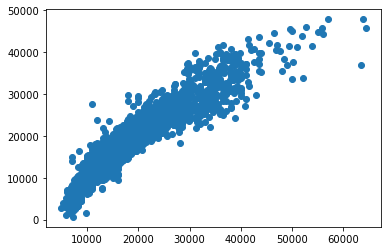

In [21]:
plt.scatter(y_test, y_pred)

In [23]:
!pip install yellowbrick

  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


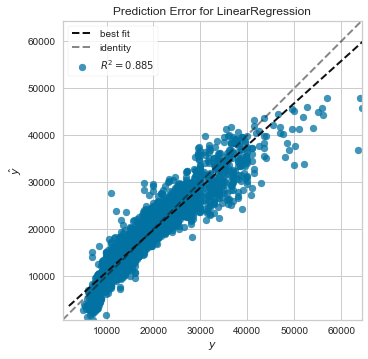

In [24]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

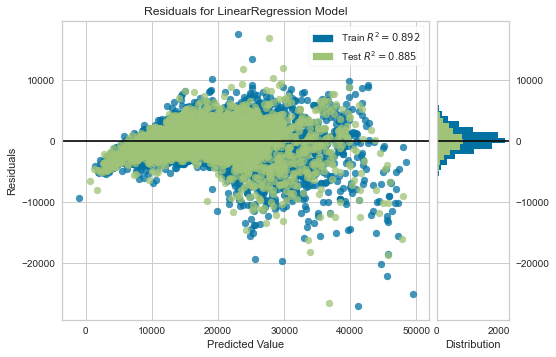

In [25]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

In [26]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [27]:
compare.sample(10)

,Actual,Pred
9391,8990,9180.009063
14697,11450,14644.933357
2977,13500,16850.938922
5554,23289,24304.855767
733,33900,22238.918750
2662,18500,17057.011115
11038,13290,14449.790433
13845,8500,5467.041214
8014,16617,16710.973592
10187,10950,12542.536317


In [28]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train)
cv_scores.mean()

0.8868185695802964

In [29]:
cv_scores

array([0.88582194, 0.88428937, 0.88782959, 0.88823152, 0.88792043])

<h2 id="implementing_ridge_Regression">4. Implementing Ridge Regression</h2>

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

### Import Modul

In [30]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

### Standardize Features 

In [31]:
ridge_model=Ridge(normalize=True)

### Fit Ridge Regression

In [32]:
ridge_model.fit(X_train, y_train)

Ridge(normalize=True)

### Predict the test set

In [33]:
y_pred=ridge_model.predict(X_test)

### Evaluate model performance

In [34]:
eval_metrics(y_test, y_pred)

r2_score: 0.8302968185113185 
 mae: 2084.1696830356263 
 mse: 9232529.691247245 
 rmse: 3038.5078066786737


### Tuning the Alpha hyperparameter

In [35]:
alpha_space = np.linspace(0.1, 20, 50)

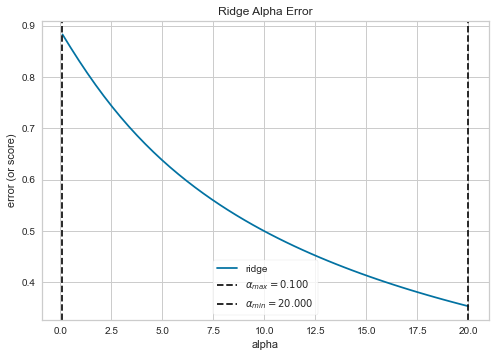

In [36]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space 

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)

visualizer.fit(X_train, y_train)
visualizer.show();

In [37]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8824349617258649 
 mae: 1751.4175548202097 
 mse: 6396006.822010961 
 rmse: 2529.0327838940643


### Predicting with new alpha values

In [38]:
ridge_model = Ridge(0.01, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.885563738102461 
 mae: 1749.0787039610889 
 mse: 6225788.91247741 
 rmse: 2495.153083976494


In [39]:
ridge_model = Ridge(17, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.3951180067050112 
 mae: 4374.787670838396 
 mse: 32907992.14138052 
 rmse: 5736.548800575179


<h2 id="implementing_lasso_Regression">5. Implementing Lasso Regression</h2>

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, we can observe the effects of different alpha values on feature coefficants.*

### Import Modul

In [40]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

### Standardize Features 

In [41]:
lasso_model = Lasso(normalize=True)

### Fit Lasso Regression

In [42]:
lasso_model.fit(X_train, y_train)

Lasso(normalize=True)

### Predict the test set

In [43]:
y_pred = lasso_model.predict(X_test)

### Evaluate model performance

In [44]:
eval_metrics(y_test, y_pred)

r2_score: 0.8779044221875436 
 mae: 1788.900151324988 
 mse: 6642486.236468555 
 rmse: 2577.3021236301643


### Tuning the Alpha hyperparameter

In [45]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [46]:
lasso_cv_model.alpha_

0.1

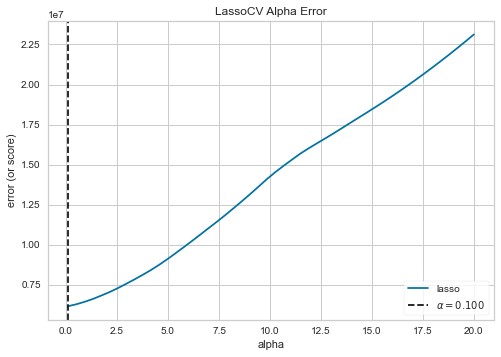

In [47]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show();

In [48]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8854975351649961 
 mae: 1750.103350846547 
 mse: 6229390.616231171 
 rmse: 2495.8747196586555


In [49]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [50]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

113

In [51]:
lasso_model = Lasso(10, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7155092983054031 
 mae: 3013.277832784201 
 mse: 15477428.456191381 
 rmse: 3934.1363037128467


In [52]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

10

In [53]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
111,make_model_Renault Espace,3352.205199
1,Gears,1808.067855
12,cc_Automatic climate control,319.959098
92,ss_LED Headlights,180.182720
20,cc_Heads-up display,120.527739
4,hp_kW,110.189635
105,make_model_Audi A3,51.945210
0,km,-0.016121
107,make_model_Opel Corsa,-134.302525
2,age,-1487.518966


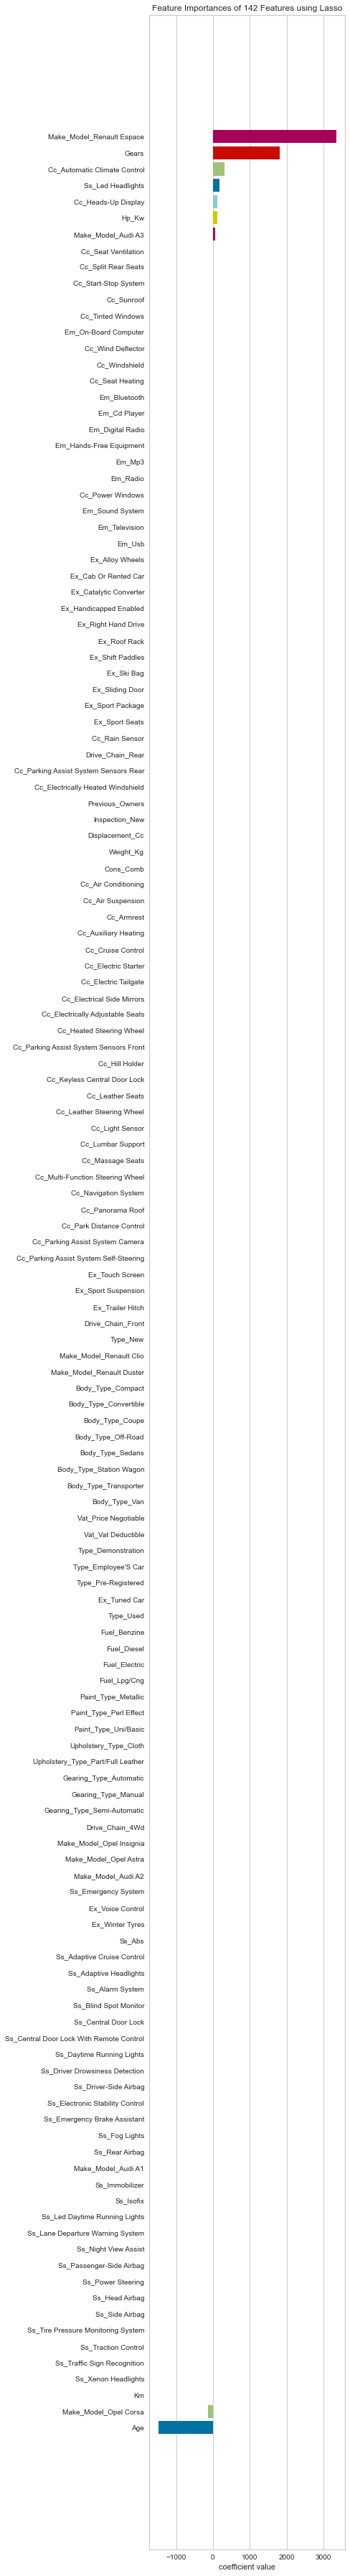

In [54]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show();

Click [here](https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/) to learn more about the effect of alpha on Lasso Regression.

## 6. Implementing Elastic-Net 

In [55]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [56]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [57]:
y_pred = elastic_model.predict(X_test)

In [59]:
eval_metrics(y_test, y_pred)

r2_score: 0.8089102396639265 
 mae: 2343.140739879137 
 mse: 10396044.850306984 
 rmse: 3224.2898210779663
